# Learning Pytorch

This is a notebook dedicated to studying the pytorch library.

In [72]:
# Importing libraries
import torch
import numpy as np
import matplotlib.pyplot as plt

# Defining matrices

An uninitialized matrix is declared, but does not contain definite known values before it is used. When an uninitialized matrix is created, whatever values were in the allocated memory at the time will appear as the initial values.

* *Matrices are tensors in pytorch*

In [2]:
A = torch.empty(3,3)
print(A)

tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 2.8026e-45, 0.0000e+00],
        [1.1210e-44, 0.0000e+00, 1.4013e-45]])


Create a random matrix

In [3]:
A = torch.rand(3,3)
print(A)

tensor([[0.0850, 0.2633, 0.6420],
        [0.0873, 0.7426, 0.7672],
        [0.3191, 0.2703, 0.8764]])


***
Create a zeros matrix of a certain type (e.g. long)

In [4]:
A = torch.zeros(3, 3, dtype = torch.long)
print(A)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


***
Create tensor from data

In [5]:
A = torch.tensor([
    [1,2,3],
    [1,2,3],
    [1,2,3]])
print(A)

tensor([[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]])


***
Create a tensor based on an existing tensor. These methods will reuse properties of the input tensor, e.g. dtype, unless new values are provided by user

In [6]:
print('Before: ', A)

A = A.new_ones(3, 3, dtype=torch.double)
print('\nAfter:', A)

A = torch.randn_like(A, dtype=torch.float)
print('\nAfter:', A)

Before:  tensor([[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]])

After: tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)

After: tensor([[-1.7136, -0.1057,  0.4751],
        [-0.9437,  0.4572, -0.7800],
        [ 0.9260,  0.9439,  1.7628]])


***
Getting tensor sizes

In [7]:
A.size()

torch.Size([3, 3])

In [8]:
A.size(0)

3

In [9]:
A.size(1)

3

# Operations

In [10]:
A = torch.rand(3,4)
B = torch.rand(3,4)

print(A)
print()
print(B)

tensor([[0.3805, 0.1411, 0.5968, 0.9377],
        [0.5654, 0.1165, 0.6391, 0.5986],
        [0.1244, 0.8859, 0.9032, 0.4445]])

tensor([[0.4012, 0.6269, 0.9375, 0.6751],
        [0.2962, 0.7056, 0.7481, 0.0676],
        [0.8241, 0.4106, 0.2684, 0.6789]])


In [11]:
print(A + B)
print()
print(torch.add(A, B))


tensor([[0.7817, 0.7680, 1.5344, 1.6128],
        [0.8616, 0.8221, 1.3872, 0.6662],
        [0.9485, 1.2965, 1.1716, 1.1234]])

tensor([[0.7817, 0.7680, 1.5344, 1.6128],
        [0.8616, 0.8221, 1.3872, 0.6662],
        [0.9485, 1.2965, 1.1716, 1.1234]])


***
You can add a tensor as the output

In [12]:
res = torch.empty(3,4)
torch.add(A, B, out=res)

print(res)
print()

res = A + B
print(res)

tensor([[0.7817, 0.7680, 1.5344, 1.6128],
        [0.8616, 0.8221, 1.3872, 0.6662],
        [0.9485, 1.2965, 1.1716, 1.1234]])

tensor([[0.7817, 0.7680, 1.5344, 1.6128],
        [0.8616, 0.8221, 1.3872, 0.6662],
        [0.9485, 1.2965, 1.1716, 1.1234]])


***
Additions in-place

* *Any operation with a postfix ```_``` will change the value of the variable in place*

In [13]:
B.add_(A)
print(B)

tensor([[0.7817, 0.7680, 1.5344, 1.6128],
        [0.8616, 0.8221, 1.3872, 0.6662],
        [0.9485, 1.2965, 1.1716, 1.1234]])


***
Other operations

In [14]:
A = torch.rand(3,3)
B = torch.rand(3,3)

print(A)
print()
print(B)

tensor([[0.0724, 0.9700, 0.7759],
        [0.5132, 0.3623, 0.9459],
        [0.3476, 0.2257, 0.2429]])

tensor([[0.5486, 0.0775, 0.3098],
        [0.5389, 0.7217, 0.3395],
        [0.3553, 0.5654, 0.3323]])


In [15]:
A * B

tensor([[0.0397, 0.0752, 0.2404],
        [0.2766, 0.2615, 0.3211],
        [0.1235, 0.1276, 0.0807]])

In [16]:
torch.mul(A, B)

tensor([[0.0397, 0.0752, 0.2404],
        [0.2766, 0.2615, 0.3211],
        [0.1235, 0.1276, 0.0807]])

In [17]:
A / B

tensor([[ 0.1321, 12.5121,  2.5044],
        [ 0.9522,  0.5020,  2.7865],
        [ 0.9782,  0.3993,  0.7310]])

In [18]:
torch.div(A, B)

tensor([[ 0.1321, 12.5121,  2.5044],
        [ 0.9522,  0.5020,  2.7865],
        [ 0.9782,  0.3993,  0.7310]])

In [19]:
C = torch.empty(3,3)
C.copy_(A)
C

tensor([[0.0724, 0.9700, 0.7759],
        [0.5132, 0.3623, 0.9459],
        [0.3476, 0.2257, 0.2429]])

In [20]:
u = torch.tensor([1,2,3])
v = torch.tensor([1,2,3])

# 1D arrays only
torch.dot(u, v)

tensor(14)

In [21]:
A = torch.rand(3,3)
b = torch.rand(3,1)

print(A)
print(b)

tensor([[0.2293, 0.4178, 0.2094],
        [0.5235, 0.9431, 0.7757],
        [0.4687, 0.7802, 0.9481]])
tensor([[0.9191],
        [0.1502],
        [0.5078]])


In [22]:
# Dot product between arrays, matrices and tensors
torch.matmul(A,b)

tensor([[0.3799],
        [1.0168],
        [1.0294]])

In [23]:
b[1]

tensor([0.1502])

In [24]:
# First column of A, just like in numpy
A[:,0]

tensor([0.2293, 0.5235, 0.4687])

In [25]:
# First row of A
A[0]

tensor([0.2293, 0.4178, 0.2094])

***
Resizing and rshaping tensors

In [26]:
A = torch.randn(4,4)
B = A.view(16)

print(B, B.size())

tensor([ 0.0762, -0.5979,  0.3021, -0.9758, -0.7990,  0.8932,  0.8605,  0.7421,
        -1.7526,  1.0915, -0.6811,  0.6041, -0.0784, -2.1582, -0.3038, -0.1947]) torch.Size([16])


In [27]:
C = A.view(-1,8)

print(C, C.size())

tensor([[ 0.0762, -0.5979,  0.3021, -0.9758, -0.7990,  0.8932,  0.8605,  0.7421],
        [-1.7526,  1.0915, -0.6811,  0.6041, -0.0784, -2.1582, -0.3038, -0.1947]]) torch.Size([2, 8])


In [28]:
x = torch.tensor([16])
x

tensor([16])

In [29]:
# Converting x to a python number
x = x.item()
x

16

# Numpy Bridge

Converting a Torch Tensor to a NumPy array and vice versa is a breeze.

The Torch Tensor and NumPy array will share their underlying memory locations (if the Torch Tensor is on CPU), and changing one will change the other.

In [30]:
A = torch.ones(5)
print(A)

tensor([1., 1., 1., 1., 1.])


In [31]:
B = A.numpy()
print(B)

[1. 1. 1. 1. 1.]


In [32]:
A.add_(1)
print(A)
print(B)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


***
The same can be done from numpy to torch

In [33]:
A = np.ones(5)
B = torch.from_numpy(A)

np.add(A, 1, out=A)

print(A)
print(B)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


# Moving tensors between devices

Tensors can be moved onto any device using the .to method.

In [34]:
A = torch.rand(3)
print(A)

if torch.cuda.is_available():
    device = torch.device('cuda')
    B = torch.ones_like(A, device=device)
    A = A.to(device)
    C = A + B
    print(C)
    print(C.to('cpu', torch.double))

tensor([0.1067, 0.4210, 0.0611])
tensor([1.1067, 1.4210, 1.0611], device='cuda:0')
tensor([1.1067, 1.4210, 1.0611], dtype=torch.float64)


# Autograd: Automatic Diferentiation

The autograd package provides automatic differentiation for all operations on Tensors. It is a define-by-run framework, which means that your backprop is defined by how your code is run, and that every single iteration can be different.

```torch.Tensor``` is the central class of the package. If you set its attribute ```.requires_grad``` as ```True```, it starts to track all operations on it. When you finish your computation you can call ```.backward()``` and have all the gradients computed automatically. The gradient for this tensor will be accumulated into ```.grad``` attribute.

To stop a tensor from tracking history, you can call ```.detach()``` to detach it from the computation history, and to prevent future computation from being tracked.

To prevent tracking history (and using memory), you can also wrap the code block in with ```torch.no_grad():```. This can be particularly helpful when evaluating a model because the model may have trainable parameters with ```requires_grad=True```, but for which we don’t need the gradients.

```Tensor``` and ```Function``` are interconnected and build up an acyclic graph, that encodes a complete history of computation. Each tensor has a ```.grad_fn``` attribute that references a ```Function``` that has created the Tensor (except for Tensors created by the user - their ```grad_fn``` is ```None```).

In [35]:
A = torch.ones(2, 2, requires_grad = True)
print(A)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [36]:
B = A + 2
print(B)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [37]:
print(B.grad_fn)

In [38]:
C = B * B * 3
out = C.mean()

print(C, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


# Gradients

In [39]:
# This has to run in order to obtain the derivative for A
out.backward()

In [40]:
A.grad

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])

In [50]:
A = torch.randn(3, requires_grad = True)
print(A)

B = A * 2
while B.data.norm() < 1000:
    B = B * 2

print(B)

tensor([ 0.1440, -0.9057,  0.4925], requires_grad=True)
tensor([ 147.4295, -927.3998,  504.3354], grad_fn=<MulBackward0>)


In [51]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype = torch.float)
B.backward(v)

print(A.grad)

tensor([1.0240e+02, 1.0240e+03, 1.0240e-01])


***
Stop autograd tracking history

In [52]:
print(A.requires_grad)
print((A**2).requires_grad)

with torch.no_grad():
    print((A**2).requires_grad)

True
True
False


***
Using detach we can copy the tensor without requirement for gradient\

In [56]:
print(A.requires_grad)
B = A.detach()
print(B.requires_grad)
print((B == A))

True
False
tensor([True, True, True])


# Function class

Creates a function that autograd can detect

In [66]:
class Exp(torch.autograd.Function):
        
    @staticmethod
    def forward(ctx, x):
        result = x.exp()
        ctx.save_for_backward(result)
        return result

    @staticmethod
    def backward(ctx, grad_output):
        result, = ctx.save_for_backward(result)
        return grad_output * result   

In [67]:
print(Exp.apply(torch.tensor([1,2,3], dtype=float)))

tensor([ 2.7183,  7.3891, 20.0855], dtype=torch.float64)


# Building Neural Networks

Using the tools seen so far we can build neural networks.

As you can see below, only the forward function and some auxiliary functions need to be defined. The backward pass is done with autograd.

In [69]:
import torch.nn as nn
import torch.nn.functional as F


class NeuralNetwork(nn.Module):
    
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        
        # Creating layers
        
        #Convolutional:
        # 1 input channel, 6 output channels and a 3x3 sized filter
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        
        # Fully connected:
        self.fc1 = nn.Linear(16 * 6 * 6, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, X):
        
        # Passing through 1st layer + max pooling
        X = F.max_pool2d(F.relu(self.conv1(X)), (2,2))
        
        # Passing through 2nd layer + max pooling
        # If you want a square filter, you can specify only one number,
        # e.g. 2 instead of (2,2)
        X = F.max_pool2d(F.relu(self.conv2(X)), 2)
        
        # Flatten X
        X = X.view(-1, self.num_flat_features(X))
        
        # Pass through fully connected layers
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        
        return X
    
    def num_flat_features(self, X):
        size = X.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

NN = NeuralNetwork()
print(NN)
          

NeuralNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


***
The learnable parameters can be accessed with ```.parameters()```

In [71]:
params = list(NN.parameters())
print(len(params))
print(params[0].size())

10
torch.Size([6, 1, 3, 3])


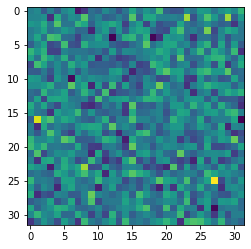

In [75]:
inp = torch.randn(1, 1, 32, 32)
plt.imshow(inp.view(32,32))
plt.show()

In [92]:
out = NN(inp)
print(out)

tensor([[-0.0396,  0.0780, -0.1359, -0.1522, -0.1032,  0.0597, -0.1119,  0.0912,
          0.0853,  0.0730]], grad_fn=<AddmmBackward>)


In [93]:
# Zero gradient buffer
NN.zero_grad()
out.backward(torch.randn(1,10))

## Loss function

There are some premade loss functions in the nn package, such as ```nn.MSELoss```, that computes the Mean Suqared Error between input and target. That does not stop the users from creating their own functions.

In [94]:
out = NN(inp)
target = torch.randn(10)
target.view(1, -1)
criterion = nn.MSELoss()

loss = criterion(out, target)
print(loss)

tensor(0.5728, grad_fn=<MseLossBackward>)


In [96]:
print(loss.grad_fn)
print(loss.grad_fn.next_functions[0][0])
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])

## Backpropagation

In [99]:
NN.zero_grad()     # zeroes the gradient buffers of all parameters (must do before backpropagation)

print('conv1.bias.grad before backward')
print(NN.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(NN.conv1.bias.grad)

conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backward
tensor([ 0.0116,  0.0175, -0.0007, -0.0234, -0.0167, -0.0181])


## Update weights

In [101]:
l_rate = 0.01
for f in NN.parameters():
    f.data.sub_(f.grad.data * l_rate)

***
The ```Torch.optim``` package has prebuilt optimizers. That does not stop users from building their own

In [102]:
import torch.optim as optim

# Initialize optimizer
optimizer = optim.SGD(NN.parameters(), lr = l_rate)

# Perform loop on following block:
optimizer.zero_grad()
out = NN(inp)
loss = criterion(out, target)
loss.backward()
optimizer.step() # perform update

In [103]:
print('conv1.bias.grad after backward')
print(NN.conv1.bias.grad)

conv1.bias.grad after backward
tensor([ 0.0126,  0.0198, -0.0054, -0.0252, -0.0194, -0.0221])


# And more

Pytorch comes with utility packages such as ```torchvision``` and ```torchvision.datasets``` (which contains useful datasets such as MNIST). There's also ```torch.utils.data.DataLoader``` for handling data.

# Training a complete image classifier

In [106]:
# Imports
import torch
import torchvision
import torchvision.transforms as transforms

In [107]:
# Pipeline of transformations
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])

In [115]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


## Visualizing the dataset

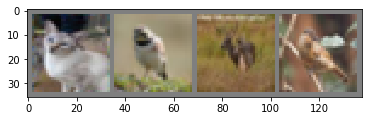

  cat  bird  deer  bird


In [116]:
def imshow(img):
    img_ = img / 2 + 0.5
    npimg = img_.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()
    
# Get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

## Defining Conv-Net

In [165]:
import torch.nn as nn
import torch.nn.functional as F


class ConvNet(nn.Module):
    
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, X):
        X = self.pool(F.relu(self.conv1(X)))
        X = self.pool(F.relu(self.conv2(X)))
        X = X.view(-1, 16 * 5 * 5)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return X
    
CNet = ConvNet()

## Defining loss and optimizer

In [166]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(CNet.parameters(), lr = 0.001)

## Training the network

In [168]:
for epoch in range(5):
    
    running_loss = 0.
    for i, data in enumerate(trainloader, 0):
        
        inputs, labels = data
        
        optimizer.zero_grad()
        
        outputs = CNet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.830
[1,  4000] loss: 1.551
[1,  6000] loss: 1.464
[1,  8000] loss: 1.423
[1, 10000] loss: 1.360
[1, 12000] loss: 1.338
[2,  2000] loss: 1.288
[2,  4000] loss: 1.248
[2,  6000] loss: 1.231
[2,  8000] loss: 1.238
[2, 10000] loss: 1.221
[2, 12000] loss: 1.202
[3,  2000] loss: 1.122
[3,  4000] loss: 1.128
[3,  6000] loss: 1.164
[3,  8000] loss: 1.135
[3, 10000] loss: 1.161
[3, 12000] loss: 1.129
[4,  2000] loss: 1.063
[4,  4000] loss: 1.068
[4,  6000] loss: 1.095
[4,  8000] loss: 1.087
[4, 10000] loss: 1.067
[4, 12000] loss: 1.091
[5,  2000] loss: 0.997
[5,  4000] loss: 1.009
[5,  6000] loss: 1.036
[5,  8000] loss: 1.043
[5, 10000] loss: 1.026
[5, 12000] loss: 1.068
Finished Training


***
We can save our trained model to memory

In [169]:
PATH = './cifar_net.pth'
torch.save(CNet.state_dict(), PATH)

## Testing the network on training data

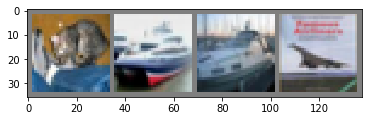

GroundTruth:    cat  ship  ship plane


In [170]:
dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [171]:
# Example on how to reload the saved model:
CNet = ConvNet()
CNet.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [172]:
outputs = CNet(images)

In [173]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship   car  ship


The results seem pretty good. (sort of)

Let us look at how the network performs on the whole dataset.

In [174]:
# Accuracy evaluation
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = CNet(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 61 %


In [175]:
# Accuracy evaluation for each class
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = CNet(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 66 %
Accuracy of   car : 78 %
Accuracy of  bird : 37 %
Accuracy of   cat : 40 %
Accuracy of  deer : 62 %
Accuracy of   dog : 38 %
Accuracy of  frog : 71 %
Accuracy of horse : 69 %
Accuracy of  ship : 79 %
Accuracy of truck : 70 %


# Training on the GPU

Just like how you transfer a Tensor onto the GPU, you transfer the neural net onto the GPU.

Let’s first define our device as the first visible cuda device if we have CUDA available.

The same can be done with ```.to()```

In [149]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [176]:
CNet.cuda()

ConvNet(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [177]:
inputs, labels = data[0].cuda(), data[1].cuda()

In [178]:
for epoch in range(5):
    
    running_loss = 0.
    for i, data in enumerate(trainloader, 0):
        
        inputs, labels = data[0].cuda(), data[1].cuda()
        
        optimizer.zero_grad()
        
        outputs = CNet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 0.918
[1,  4000] loss: 0.935
[1,  6000] loss: 0.940
[1,  8000] loss: 0.926
[1, 10000] loss: 0.928
[1, 12000] loss: 0.900
[2,  2000] loss: 0.946
[2,  4000] loss: 0.919
[2,  6000] loss: 0.930
[2,  8000] loss: 0.919
[2, 10000] loss: 0.912
[2, 12000] loss: 0.927
[3,  2000] loss: 0.941
[3,  4000] loss: 0.928
[3,  6000] loss: 0.927
[3,  8000] loss: 0.921
[3, 10000] loss: 0.925
[3, 12000] loss: 0.908
[4,  2000] loss: 0.926
[4,  4000] loss: 0.927
[4,  6000] loss: 0.913
[4,  8000] loss: 0.925
[4, 10000] loss: 0.931
[4, 12000] loss: 0.923
[5,  2000] loss: 0.931
[5,  4000] loss: 0.924
[5,  6000] loss: 0.927
[5,  8000] loss: 0.917
[5, 10000] loss: 0.935
[5, 12000] loss: 0.921
Finished Training


In [179]:
# Accuracy evaluation for each class
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].cuda(), data[1].cuda()
        outputs = CNet(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 66 %
Accuracy of   car : 78 %
Accuracy of  bird : 37 %
Accuracy of   cat : 40 %
Accuracy of  deer : 62 %
Accuracy of   dog : 38 %
Accuracy of  frog : 71 %
Accuracy of horse : 69 %
Accuracy of  ship : 79 %
Accuracy of truck : 70 %
